In [1]:
import sklearn

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv("state_county_info_cleaned.csv")

display(data)

,datapoint,date,state,county,cases,deaths,population_density_per_sqmi,total_population,percent_smokers,percent_adults_with_obesity,...,percent_age_65_and_older,percent_age_17_and_younger,percent_overcrowding,date_stay_at_home_effective,cases_population_proportion,deaths_population_proportion,mean_daily_cases_proportion,median_daily_cases_proportion,above_daily_mean,above_daily_median
0,0,2020-03-24,Alabama,Autauga,1,0.0,92.605533,55049.0,18.081557,33.3,...,14.0,25.2,1.2,0,0.000018,0.000000,0.000104,0.000052,0,0
1,1,2020-03-25,Alabama,Autauga,4,0.0,92.605533,55049.0,18.081557,33.3,...,14.0,25.2,1.2,0,0.000073,0.000000,0.000118,0.000059,0,1
2,2,2020-03-26,Alabama,Autauga,6,0.0,92.605533,55049.0,18.081557,33.3,...,14.0,25.2,1.2,0,0.000109,0.000000,0.000142,0.000072,0,1
3,3,2020-03-27,Alabama,Autauga,6,0.0,92.605533,55049.0,18.081557,33.3,...,14.0,25.2,1.2,0,0.000109,0.000000,0.000166,0.000082,0,1
4,4,2020-03-28,Alabama,Autauga,6,0.0,92.605533,55049.0,18.081557,33.3,...,14.0,25.2,1.2,0,0.000109,0.000000,0.000190,0.000095,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601151,601151,2020-11-30,Wisconsin,Wood,4476,32.0,92.845154,73621.0,15.938731,29.1,...,18.6,21.9,1.1,1,0.060798,0.000435,0.043288,0.041328,1,1
601152,601152,2020-12-01,Wisconsin,Wood,4503,33.0,92.845154,73621.0,15.938731,29.1,...,18.6,21.9,1.1,1,0.061165,0.000448,0.043888,0.042001,1,1
601153,601153,2020-12-02,Wisconsin,Wood,4622,34.0,92.845154,73621.0,15.938731,29.1,...,18.6,21.9,1.1,1,0.062781,0.000462,0.044646,0.042677,1,1
601154,601154,2020-12-03,Wisconsin,Wood,4677,37.0,92.845154,73621.0,15.938731,29.1,...,18.6,21.9,1.1,1,0.063528,0.000503,0.045387,0.043319,1,1


In [3]:
selected_features = ['population_density_per_sqmi','total_population', 'percent_smokers',
                     'percent_adults_with_obesity', 'percent_uninsured', 'num_primary_care_physicians',
                     'percent_vaccinated', 'income_ratio', 'life_expectancy', 'percent_adults_with_diabetes',
                     'percent_uninsured_2', 'other_primary_care_provider_rate', 'median_household_income',
                     'percent_less_than_18_years_of_age', 'percent_65_and_over','percent_black',
                     'percent_american_indian_alaska_native', 'percent_asian',
                     'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic',
                     'percent_non_hispanic_white', 'percent_not_proficient_in_english',
                     'percent_female', 'percent_rural', 'per_capita_income',
                     'percent_below_poverty', 'percent_unemployed_CDC', 'percent_age_65_and_older',
                     'percent_age_17_and_younger', 'percent_overcrowding', 'date_stay_at_home_effective',
                     'above_daily_mean', 'above_daily_median']

dtc_data = data[selected_features]

dtc = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(dtc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), dtc_data['above_daily_mean'], test_size=0.2)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

importance_mean = dtc.feature_importances_

print('above daily mean prediction: ' + str(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(dtc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), dtc_data['above_daily_median'], test_size=0.2)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

importance_median = dtc.feature_importances_

print('above daily median prediction: ' + str(accuracy_score(y_test, y_pred)))

above daily mean prediction: 0.8412236343070064
above daily median prediction: 0.8215034267083638


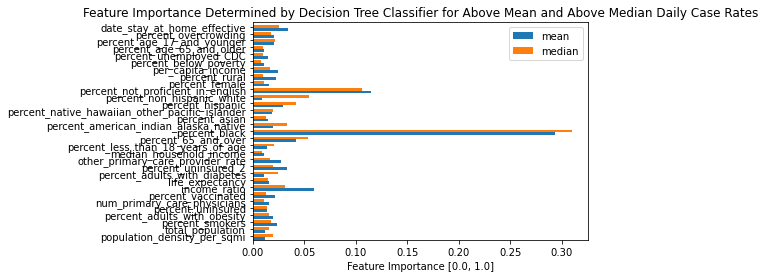

In [4]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2], mn=importance_mean, md=importance_median)) 

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.xlabel('Feature Importance [0.0, 1.0]')
plt.title('Feature Importance Determined by Decision Tree Classifier for Above Mean and Above Median Daily Case Rates')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [5]:
selected_features = ['population_density_per_sqmi','total_population', 'percent_smokers',
                     'percent_adults_with_obesity', 'percent_uninsured', 'num_primary_care_physicians',
                     'percent_vaccinated', 'income_ratio', 'life_expectancy', 'percent_adults_with_diabetes',
                     'percent_uninsured_2', 'other_primary_care_provider_rate', 'median_household_income',
                     'percent_less_than_18_years_of_age', 'percent_65_and_over','percent_black',
                     'percent_american_indian_alaska_native', 'percent_asian',
                     'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic',
                     'percent_non_hispanic_white', 'percent_not_proficient_in_english',
                     'percent_female', 'percent_rural', 'per_capita_income',
                     'percent_below_poverty', 'percent_unemployed_CDC', 'percent_age_65_and_older',
                     'percent_age_17_and_younger', 'percent_overcrowding', 'date_stay_at_home_effective',
                     'above_daily_mean', 'above_daily_median']

rfc_data = data[selected_features]

rfc = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(rfc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), rfc_data['above_daily_mean'], test_size=0.2)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

importance_mean = rfc.feature_importances_

print('above daily mean prediction: ' + str(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(rfc_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), rfc_data['above_daily_median'], test_size=0.2)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

importance_median = rfc.feature_importances_

print('above daily median prediction: ' + str(accuracy_score(y_test, y_pred)))

above daily mean prediction: 0.8386702375407545
above daily median prediction: 0.8236742298223435


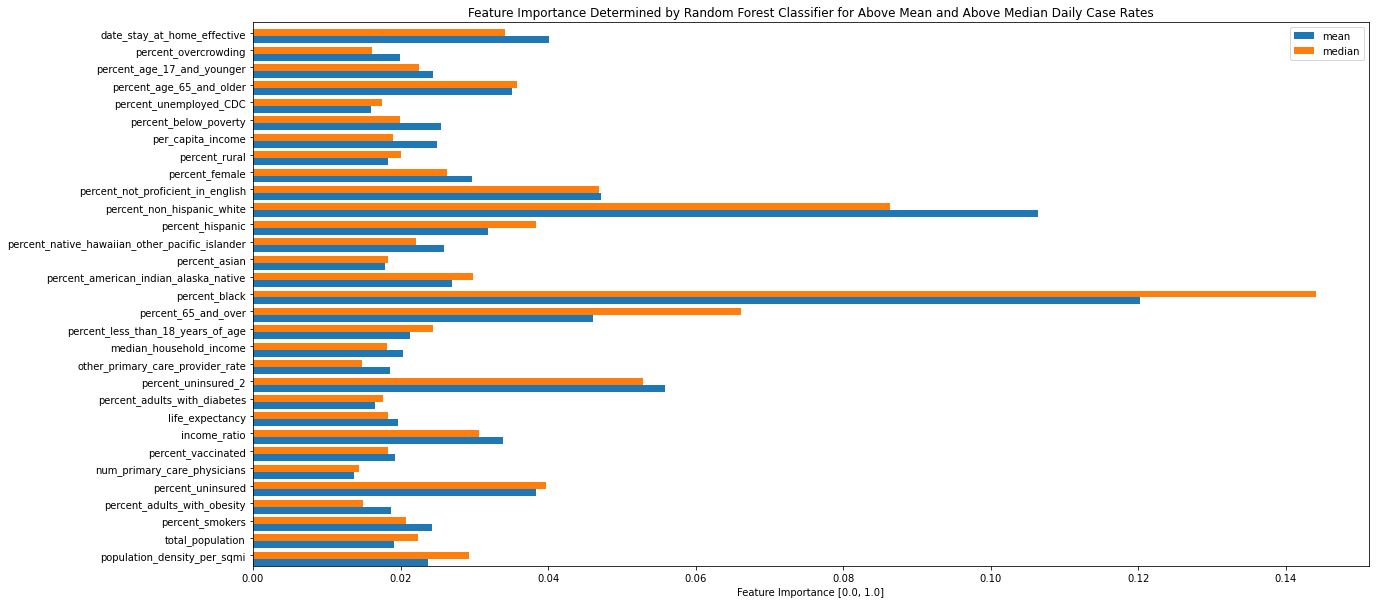

In [6]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2],
                           mn=importance_mean, md=importance_median)) 

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.xlabel('Feature Importance [0.0, 1.0]')
plt.title('Feature Importance Determined by Random Forest Classifier for Above Mean and Above Median Daily Case Rates')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [7]:
selected_features = ['population_density_per_sqmi','total_population', 'percent_smokers',
                     'percent_adults_with_obesity', 'percent_uninsured', 'num_primary_care_physicians',
                     'percent_vaccinated', 'income_ratio', 'life_expectancy', 'percent_adults_with_diabetes',
                     'percent_uninsured_2', 'other_primary_care_provider_rate', 'median_household_income',
                     'percent_less_than_18_years_of_age', 'percent_65_and_over','percent_black',
                     'percent_american_indian_alaska_native', 'percent_asian',
                     'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic',
                     'percent_non_hispanic_white', 'percent_not_proficient_in_english',
                     'percent_female', 'percent_rural', 'per_capita_income',
                     'percent_below_poverty', 'percent_unemployed_CDC', 'percent_age_65_and_older',
                     'percent_age_17_and_younger', 'percent_overcrowding', 'date_stay_at_home_effective',
                     'above_daily_mean', 'above_daily_median']

lr_data = data[selected_features]

X_train, X_test, y_train, y_test = train_test_split(lr_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), lr_data['above_daily_mean'], test_size=0.2)

LogReg = LogisticRegression(solver='lbfgs', max_iter=10000)

LogReg.fit(X_train, y_train)

importance_mean = LogReg.coef_[0]

y_pred = LogReg.predict(X_test)

print('above daily mean prediction: ' + str(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(lr_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), lr_data['above_daily_median'], test_size=0.2)

LogReg = LogisticRegression(solver='lbfgs', max_iter=10000)

LogReg.fit(X_train, y_train)

importance_median = LogReg.coef_[0]

y_pred = LogReg.predict(X_test)

print('above daily median prediction: ' + str(accuracy_score(y_test, y_pred)))

above daily mean prediction: 0.7320347328498237
above daily median prediction: 0.7016019029875574


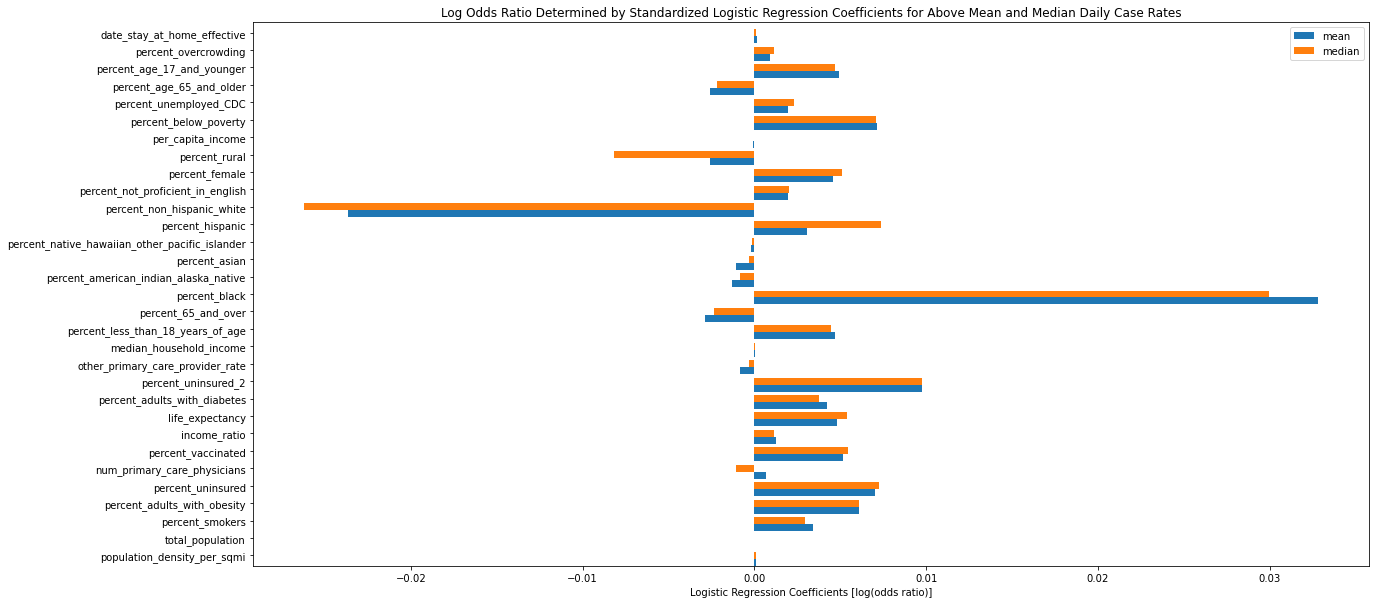

In [8]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2],
                           mn=importance_mean, md=importance_median)) 

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.xlabel('Logistic Regression Coefficients [log(odds ratio)]')
plt.title('Log Odds Ratio Determined by Standardized Logistic Regression Coefficients for Above Mean and Median Daily Case Rates')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [9]:
selected_features = ['population_density_per_sqmi','total_population', 'percent_smokers',
                     'percent_adults_with_obesity', 'percent_uninsured', 'num_primary_care_physicians',
                     'percent_vaccinated', 'income_ratio', 'life_expectancy', 'percent_adults_with_diabetes',
                     'percent_uninsured_2', 'other_primary_care_provider_rate', 'median_household_income',
                     'percent_less_than_18_years_of_age', 'percent_65_and_over','percent_black',
                     'percent_american_indian_alaska_native', 'percent_asian',
                     'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic',
                     'percent_non_hispanic_white', 'percent_not_proficient_in_english',
                     'percent_female', 'percent_rural', 'per_capita_income',
                     'percent_below_poverty', 'percent_unemployed_CDC', 'percent_age_65_and_older',
                     'percent_age_17_and_younger', 'percent_overcrowding', 'date_stay_at_home_effective',
                     'above_daily_mean', 'above_daily_median']

lr_data = data[selected_features]

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(lr_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), lr_data['above_daily_mean'], test_size=0.2)

LogReg = LogisticRegression(solver='lbfgs', max_iter=10000)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogReg)])

pipe.fit(X_train, y_train)  # apply scaling on training data

importance_mean = pipe.named_steps['LogReg'].coef_[0]

print('above daily mean prediction: ' + str(pipe.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(lr_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), lr_data['above_daily_median'], test_size=0.2)

pipe.fit(X_train, y_train)  # apply scaling on training data

importance_median = pipe.named_steps['LogReg'].coef_[0]

print('above daily mean prediction: ' + str(pipe.score(X_test, y_test)))

above daily mean prediction: 0.7655283119302682
above daily mean prediction: 0.7382643555792135


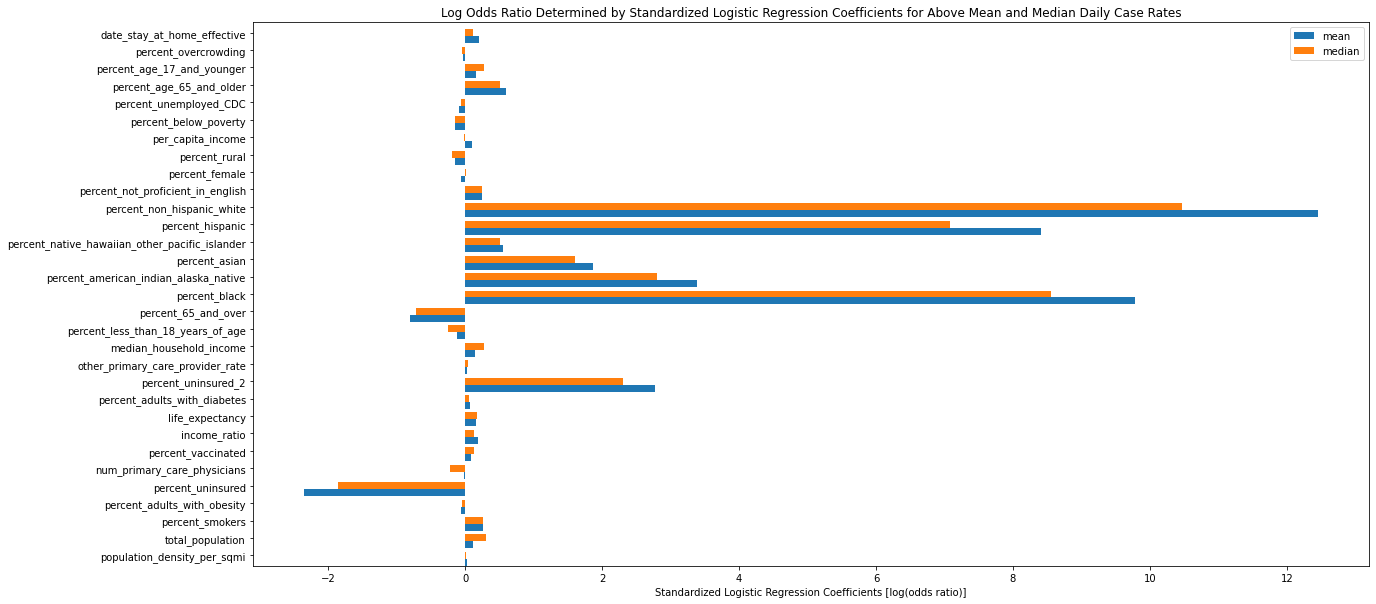

In [10]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2],
                           mn=importance_mean, md=importance_median)) 

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.title('Log Odds Ratio Determined by Standardized Logistic Regression Coefficients for Above Mean and Median Daily Case Rates')
plt.xlabel('Standardized Logistic Regression Coefficients [log(odds ratio)]')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

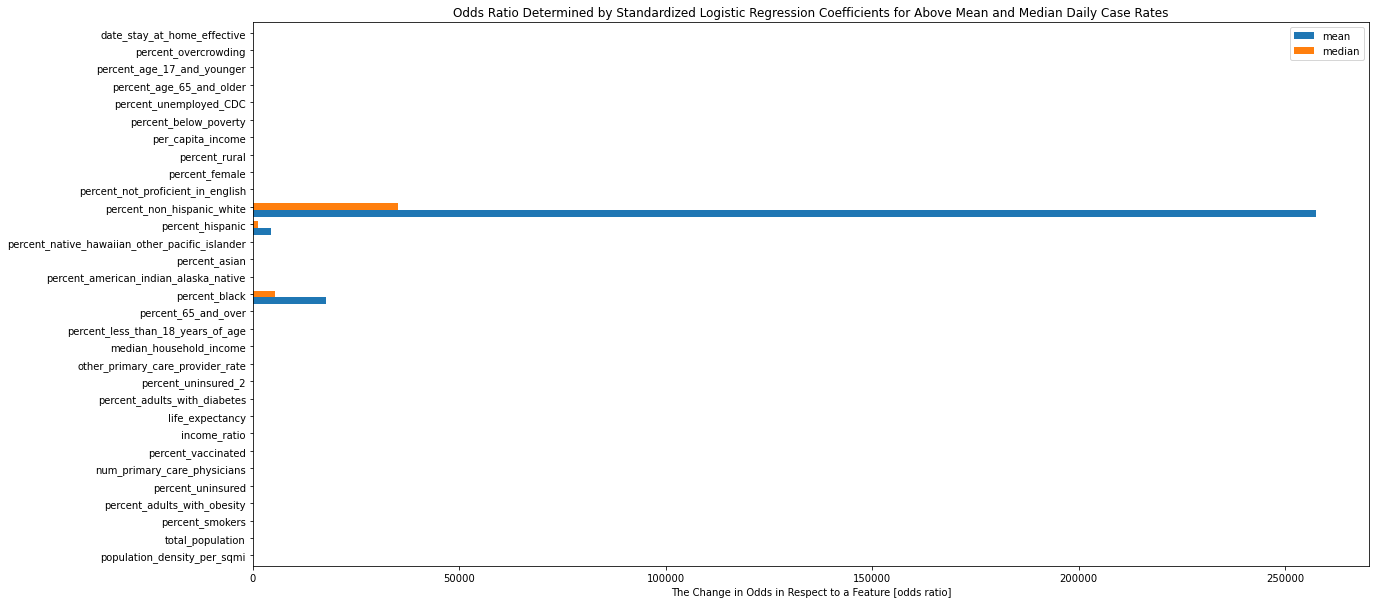

In [11]:
# plot feature importance

plot_df = pd.DataFrame(dict(graph=selected_features[:-2],
                           mn=np.exp(importance_mean), md=np.exp(importance_median)) )

ind = np.arange(len(plot_df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, plot_df.mn, width, label='mean')
ax.barh(ind + width, plot_df.md, width, label='median')

ax.set(yticks=ind + width, yticklabels=plot_df.graph, ylim=[2 * width - 1, len(plot_df)])
ax.legend()

plt.title('Odds Ratio Determined by Standardized Logistic Regression Coefficients for Above Mean and Median Daily Case Rates')
plt.xlabel('The Change in Odds in Respect to a Feature [odds ratio]')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [12]:
selected_features = ['population_density_per_sqmi','total_population', 'percent_smokers',
                     'percent_adults_with_obesity', 'percent_uninsured', 'num_primary_care_physicians',
                     'percent_vaccinated', 'income_ratio', 'life_expectancy', 'percent_adults_with_diabetes',
                     'percent_uninsured_2', 'other_primary_care_provider_rate', 'median_household_income',
                     'percent_less_than_18_years_of_age', 'percent_65_and_over','percent_black',
                     'percent_american_indian_alaska_native', 'percent_asian',
                     'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic',
                     'percent_non_hispanic_white', 'percent_not_proficient_in_english',
                     'percent_female', 'percent_rural', 'per_capita_income',
                     'percent_below_poverty', 'percent_unemployed_CDC', 'percent_age_65_and_older',
                     'percent_age_17_and_younger', 'percent_overcrowding', 'date_stay_at_home_effective',
                     'above_daily_mean', 'above_daily_median']

nn_data = data[selected_features]

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(nn_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), nn_data['above_daily_mean'], test_size=0.2)

pipe = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, max_iter=300))

pipe.fit(X_train, y_train)  # apply scaling on training data

print('above daily mean prediction: ' + str(pipe.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(nn_data.drop(['above_daily_mean', 'above_daily_median'], axis=1), nn_data['above_daily_median'], test_size=0.2)

pipe.fit(X_train, y_train)  # apply scaling on training data

print('above daily median prediction: ' + str(pipe.score(X_test, y_test)))

above daily mean prediction: 0.8296293831924945
above daily median prediction: 0.8153237074988355


In [ ]:
selected_features = ['population_density_per_sqmi','total_population', 'percent_smokers',
                     'percent_adults_with_obesity', 'percent_uninsured', 'num_primary_care_physicians',
                     'percent_vaccinated', 'income_ratio', 'life_expectancy', 'percent_adults_with_diabetes',
                     'percent_uninsured_2', 'other_primary_care_provider_rate', 'median_household_income',
                     'percent_less_than_18_years_of_age', 'percent_65_and_over','percent_black',
                     'percent_american_indian_alaska_native', 'percent_asian',
                     'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic',
                     'percent_non_hispanic_white', 'percent_not_proficient_in_english',
                     'percent_female', 'percent_rural', 'per_capita_income',
                     'percent_below_poverty', 'percent_unemployed_CDC', 'percent_age_65_and_older',
                     'percent_age_17_and_younger', 'percent_overcrowding', 'date_stay_at_home_effective',
                     'above_daily_mean', 'above_daily_median', 'cases_population_proportion']

rfr_data = data[selected_features]

rfr = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(rfr_data.drop(['above_daily_mean', 'above_daily_median', 'cases_population_proportion'], axis=1), rfr_data['cases_population_proportion'], test_size=0.3)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

importance_mean = rfr.feature_importances_

print('MSE: ' + str(mean_squared_error(y_test, y_pred, squared=False)))

In [ ]:
datapoint = np.arange(0, 600)

y_test_list = y_test.to_list()

hop = np.arange(0, 600, 5)

for i in hop:

    plt.scatter(datapoint[i], y_test_list[i], color='blue')
    plt.scatter(datapoint[i], y_pred[i], color='orange')
    
    plt.vlines(x=i, ymin=y_test_list[i], ymax=y_pred[i], colors='purple', ls=':', lw=2, label='test')
    
    orange_patch = mpatches.Patch(color='orange', label='prediction')
    blue_patch = mpatches.Patch(color='blue', label='test_data')
    purple_patch = mpatches.Patch(color='darkorchid', label='test/prediction difference')
    plt.legend(handles=[orange_patch, blue_patch, purple_patch])
    
    plt.xlabel('Test Data Point')
    plt.ylabel('cases_population_proportion')
    plt.title('Predicted vs. Test Data for Dataset 2 cases_population_proportion (n=120)')
    
plt.rcParams["figure.figsize"] = (20,10)

plt.show()